Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). On JupyterLab, you may want to hit the "Validate" button as well.

Caution: do not mess with the notebook's metadata; do not change a pre-existing cell's type; do not copy pre-existing cells (add new ones with the + button instead). This will break autograding; you will get a 0; you are warned.

<table style="width: 100%; border: none;" cellspacing="0" cellpadding="0" border="0">
  <tr>
    <td><img src="https://www.planetegrandesecoles.com/wp-content/uploads/2021/07/Identite%CC%81-visuelle-Plane%CC%80te-BAC-8-600x398.png" style="float: left; width: 100%" />
</td>
    <td><a style="font-size: 3em; text-align: center; vertical-align: middle;" href="https://moodle.polytechnique.fr/course/view.php?id=19260">[CSC2S004EP - 2024] - Introduction to Machine Learning</a>
</td>
  </tr>
</table>

<a style="font-size: 3em;">Lab Session 7: introduction to neural networks libraries Tensorflow and PyTorch, glimpse at Convolutional Neural Networks</a>

J.B. Scoggins - Adrien Ehrhardt - Johannes Lutzeyer - Jesse Read

1. **You should generally read warning/error messages (and be able to tell whether they can be ignored)**.
2. **Most of the time, you can indeed ignore warning messages.**
3. **Please refrain from calling a teacher and saying things like** *'I have a red output (awkward silence meaning you haven't read it nor plan to read it, let alone tried to understand what it says)'*.

# Your implementation

After lab 06, you now have a fully functioning neural network model which can be used in real machine-learning problems. There are many things which you could add at this point to make the model more effective. Consider playing with some of the following:

- Adding weight regularization
- Using different activation functions such as ReLU or Tanh
- Improve the efficiency by making the backprop algorithm work on whole batches at once
- Implement the SGD algorithm
- Redesign the model to allow plug-and-play layers to be stacked together, allowing more complicated layers such as convolutions to be used.

Of course the list is endless!

# Exercise 1: Multiple choice quiz testing your understanding of core concepts

Please fill in the dictionary in the next code cell with the correct answers to the below questions. Please note that each question only has one correct answer and that the answers entered into the dictionary should in captial letters and of string type. 

**Question 1**:
This is an example question to illustrate the answer format.

A) Wrong Answer. 

B) Right Answer.

**Question 2**:
In which learning task is the cross-entropy loss most suitable?

A) Regression. 

B) Classification.

**Question 3**:
In which learning task is the quadratic loss most suitable?

A) Regression. 

B) Classification.

**Question 4**:
In the backpropagation algorithm used to train neural networks, which gradients do we use to update the neural network parameters?

A) the gradient of the loss with respect to the input. 

B) the gradient of the loss with respect to the true labels. 

C) the gradient of the loss with respect to the parameters. 

**Question 5**:
True or False: "In the update step function implementing Gradient Descent the gradients corresponding to the different datapoints are averaged".

A) This statement is true. 

B) This statement is false.

**Question 6**:
Does the loss of a neural network decrease at every epoch throughout training for all datasets and learning tasks?

A) No, the loss can increase for certain epochs. 

B) Yes, the loss is always strictly decreasing throughout training.

**Question 7**:
If a neural network takes inputs of dimension 784 and the first hidden layer is composed of 64 neurons (using the notation $\sigma(xW+b)$, where $x \in \mathbb{R}^{1 \times 784}$ is the input). What are the dimensions of the weight matrix $W$ and the bias vector $b$?

A) $W\in \mathbb{R}^{784 \times 64}$ and $b\in \mathbb{R}^{784}$. 

B) $W\in \mathbb{R}^{50176 \times 64}$ and $b\in \mathbb{R}^{64}$. 

C) $W\in \mathbb{R}^{64 \times 784}$ and $b\in \mathbb{R}^{784}$. 

D) $W\in \mathbb{R}^{784 \times 64}$ and $b\in \mathbb{R}^{64}$. 

**Question 8**:
What is the total number of parameters (including weight matrices and bias vectors) of a neural network, that takes 2 dimensional inputs, contains one single hidden layer of dimension 32 and gives 1 dimensional outputs?

A) 99. 

B) 129.

C) 161.

D) 225.


In [ ]:
# YOUR CODE HERE

# Uncomment the following dictionary and put your answers
answers= {
    "q1": "B",
    "q2": "B",
    "q3": "A",
    "q4": "C",
    "q5": "A",
    "q6": "A",
    "q7": "D",
    "q8": "B",    
}

# Exercise 2: introduction to Tensorflow

As you have now seen, building a neural network and training from scratch can require a significant amount of effort.  Furthermore, the naive design of our `Network` class does not allow us to easily incorporate new kinds of layers such as convolutions, dropout, or batch normalization.  In practice of course, several libraries already exist that provide all of this functionality for you, so that you can focus on building a model for your specific dataset.  Here, we will show you how to redo the fashion classification example above, with less than 10 lines of code using the Tensorflow library. You can [find this example](https://www.tensorflow.org/tutorials) directly on the Tensorflow website if you are interested.  Let's walk through the code below.

### Import Tensorflow and download the MNIST dataset

Tensorflow includes a high-level neural network architecture building API called Keras which makes it easy to create neural network models using "off-the-shelf" layers. In addition, Keras also provides commonly used datasets, such as the MNIST dataset.  

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]

### Build the NN model

In the next two cells, the Keras API is used to create a simple dense Multi-Layer Perceptron model, similar to what you implemented in lab 06, with the following layers:

- `Flatten` takes an N-dimensional array and reshapes it into a 1D array. In this case, the images are 28x28 pixels, which get converted to a 784 1D tensor.
- `Dense` is exactly like the type of implicit layers we coded in our `Network` class.  That is, they take some 1D input and apply a linear transformation before applying a nonlinear activation.  In this case we are using 512 nodes in the dense layer.
- `Dropout` is a little more advanced.  As you have seen in the lecture, a dropout layer sets some percentage of the inputs to the layer to zero.  During training, each time data is propagated through the dropout layer, a different random set of nodes is zeroed out.  This forces the network to make more generalizations about the data and reduces overfitting.  When training is done, the dropout layer allows all the nodes to pass through, but multiplies the result by the dropout factor such that the sum remains the same.  In this case, 20% of the nodes are randomly canceled out during training and the result during evaluation is multiplied by 0.8.  
- The final layer is a dense layer of 10 nodes corresponding to the one-hot encoding of the digit labels.  Note that a softmax activation function is used so that these nodes will represent probabilities.

In the second cell, the model is "compiled" with an optimizer (Adam), loss function (sparse categorical crossentropy), and a metric, which is responsible for providing useful output during training.  In this case, the `accuracy` metric is used which computes the total number of training samples that were correctly categorized as training progresses.

You may modify the model as you wish.

**You may ignore a Warning that may arise from the following cell**.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
tf.config.list_physical_devices()  # we should be able to leverage the GPU

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train and evaluate the model

In the last step, we train the model.  This happens in the first line below, were we call the model's `fit` function, which takes the training data and a number of epochs.  The number of batches per epoch is handled by default.  In the second line, we evaluate the model on our testing data to see how well it does on data it has never seen before.  Note that we get a ~ 79% accuracy with this simple model!

In [ ]:
n_epoch = 5

In [ ]:
model.fit(x_train, y_train, epochs=n_epoch)
loss, acc = model.evaluate(x_test, y_test)
print("Final test loss:", loss)
print("Final test accuracy:", acc)

**IF AND ONLY IF** the previous cell resulted **in an Error** (**NOT a Warning**, *e.g.* `DNN library initialization failed`, `FailedPreconditionError: Graph execution error`) and you could not train your network (*e.g.* the last line does not show "Final test accuracy"), **UNCOMMENT AND RUN THE FOLLOWING CELL (it can be very long, wait until the cell is NOT marked `[*]` anymore), THEN COMMENT THE COMMAND AGAIN AND RESTART THE KERNEL AND RETRY**.

In [ ]:
#!python3 -m pip install nbgrader tensorflow torch torchvision torchaudio --force-reinstall --trusted-host pytorch.org --extra-index-url https://download.pytorch.org/whl/cu126 --no-warn-script-location
#!python3 -m pip install matplotlib

In [ ]:
print("The probabilities for each class for the first test point:\n", model.predict(x_test)[0, :].reshape(-1, 1))
print("The true class of the first test point:\n", y_test[0].reshape(-1, 1))
plt.imshow(x_test[0, :], cmap='gray');

# Exercise 3: introduction to PyTorch

Let's do the same with PyTorch. There are many deep learning frameworks, but Tensorflow and PyTorch are the most used, with Tensorflow becoming out-of-fashion (!) in favor of PyTorch, generally dubbed "simpler" (well, we'll see how that turns out!).

(Tensorflow is indeed more complicated but in the code above, we relied on Keras, a library built on top and meant to simplify the usage of several deep learning frameworks.)

In [ ]:
import torch
from torch import nn, optim, no_grad
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # we should leverage the GPU

Re-download and/or unzip the MNIST dataset with the torch API / format with the following commands.

In [ ]:
%%bash
mkdir -p $HOME/.keras/datasets/FashionMNIST
ln -s -f $HOME/.keras/datasets/fashion-mnist $HOME/.keras/datasets/FashionMNIST/raw

In [ ]:
training_data = datasets.FashionMNIST(
    root="~/.keras/datasets",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="~/.keras/datasets",
    train=False,
    download=True,
    transform=ToTensor(),
)

Create data loaders (iterators over the training and testing data, think `range`), and put the result on the GPU if available.

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_dataloader = DataLoader(test_data, batch_size=64, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

Create the model as a class inheriting from nn.Module.
You must at least define `__init__`, where you might want to define the structure of your network, as well as the `forward` method (which is basically `feed_forward`).

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Instantiate your model by instantiating an object of this new class. You still need a loss function (our `Cost`), and an optimizer (we hard-coded Gradient Descent in `Network`).

Then we iterate on the training data for a given number of epochs, using a `for` loop. At each iteration, we must:
* Perform the feedforward pass;
* Compute the loss ($\delta^L$);
* Perform backpropagation by:
    * Calculating the loss and the gradients of $W$ and $b$ for $l < L$;
    * Update the parameters $W$ and $b$.

In [ ]:
model = NeuralNetwork()
model.to(device)  # to GPU if available
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, eps=1e-07)
model.train()  # Switch to training mode

for epoch in range(n_epoch):
    print(f"Epoch {epoch}")
    for batch, (X, y) in enumerate(train_dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

To compute the testing loss / error, we use the iterator over the test dataset and the loss function, which we previously defined.

In [ ]:
model.eval()  # Switch to evaluation mode
test_loss, correct = 0, 0
# Do not compute the gradient
with no_grad():
    for X, y in test_dataloader:
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
test_loss /= len(test_dataloader.dataset)
correct /= len(test_dataloader.dataset)
print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Bonus: Your turn
Play with tensorflow / keras and / or pytorch and provide your own model and training routine.

Try to separate the data into train / dev / test where train is used to train the model, dev is used to evaluate the model's performance at each epoch, and test is hold out until the end of the training.

You may want to test on other datasets. See [keras datasets](https://keras.io/api/datasets/) and [PyTorch datasets](https://pytorch.org/vision/stable/datasets.html).

# Introduction to Convolutional Neural Networks with tf.keras

The [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) provides 60000 32x32-pixel color images, classified into 10 categories.  The figure below provides a random sample of some images in each category.

![](https://github.com/jbscoggi/teaching/blob/master/Polytechnique/CSE204/artwork/cifar_images.png?raw=1)

During this session, you will learn how to build a Convolutional Neural Network (CNN), which (when trained) will be able to automatically classify new images into one of these categories.  We will make use of the [Keras library](https://www.tensorflow.org/guide/keras) which provides a high-level interface to TensorFlow, which you have already seen above.

Keras is a high-level API to build and train deep learning models. It's used for fast prototyping, advanced research, and production, with three key advantages:

- __User friendly__: Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
- __Modular and composable__: Keras models are made by connecting configurable building blocks together, with few restrictions.
- __Easy to extend__: Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models.

In Keras, models are built by assembling multiple layers.  Suppose we want to create a new multilayer perceptron model to categorize data with 128 features into 10 labeled categories. The Keras code could look like:

```python
# Create a sequential model
model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model
model.add(tf.keras.layers.Dense(64, activation='relu'), input_shape=[128])
# Add another
model.add(tf.keras.layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units
model.add(tf.keras.layers.Dense(10, activation='softmax'))
```

The `input_shape` argument must be given for the first layer in the model, however all other layers will automatically determine the input shape based on the previous layer in the model.  Note that the code above is substantially simpler than the corresponding TensorFlow code.  This is particularly useful for building convolutional or other types of layers, as we will see.

Once built, a model's learning can be configured with the `compile()` function

```python
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.train.AdamOptimizer(0.001), 
    metrics=['accuracy'])
```

In this case, a cross-entropy loss function is used with the ADAM optimization algorithm.  The `metrics` argument allows the model to keep track of a number of [training metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) during training.

Once configured, training is performed using the `fit()` function.

```python
model.fit(data, labels, epochs=10, batch_size=32)
```

The function takes an array-like (could be numpy array) `data` argument and the corresponding `labels` values, and performs the optimization of the learnable parameters in the model.  See the documentation for the [fit()](https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#fit) function for more details.

Once trained, the model can be used to predict, using the `predict()` function. 

```python
prediction = model.predict(new_data)
```
  
Begin by importing the necessary modules. **You may ignore any warning that might pop up**.

In [ ]:
import os
import pandas as pd
import sklearn.metrics as metrics
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

## Exercise 4: Understand the dataset

Understanding your dataset is the first prerequisit to training any model. The CIFAR-10 dataset is provided directly from Keras. Implement the function `load_cifar_data` below to:

- Verify that the shape of the image and target arrays are what you expect.
- Create a list of `labels` corresponding to the 10 categories.  This will be used to convert the 0-9 digits in the target arrays to string labels. The categories are labeled as follows:
  0. airplane
  1. automobile
  2. bird
  3. cat
  4. deer
  5. dog
  6. frog
  7. horse
  8. ship
  9. truck
- Normalize the image data from [0,255] to be [0,1]. Normalizing improves model training (to test this, you can comment out the normalization later);
- Lastly, convert the target arrays to one-hot encodings. *Hint*: checkout the [`tf.keras.utils.to_categorical()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical).

In [ ]:
from tensorflow.keras.utils import to_categorical

def load_cifar_data():
    """
    Loads the CIFAR-10 dataset using Keras and preprocess for training: 
        - one-hot encoding;
        - normalization;
        - labels (list of strings associated to the one-hot encoding of `y`).
    """
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # YOUR CODE HERE
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']
    
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
    return x_train, y_train, x_test, y_test, labels

In [ ]:
x_train, y_train, x_test, y_test, labels = load_cifar_data()
assert x_train.shape == (50000, 32, 32, 3)
assert 0 <= x_train[0][0][0][0] <= 1

Implement the function `show_first_n_images_in_categories` below to visualize some images in each category using the `imshow()` function in `matplotlib.pyplot`. Can you recreate the figure at the top of today's lab?

*Hint*: the it was created using the first 8 images belonging to each category in the training data.

In [ ]:
# Visualize the dataset
def show_first_n_images_in_categories(n: int, images: np.array, categories: np.array,
                                      labels: np.array, file_name: str = None):
    """
    Plots the first n images in each category from the image data.
    The image must not have any visible axis.
    The columns must have titles corresponding to the categories' names.
    
    :param int n: number of images per category to plot
    :param numpy.array images: images as numerical data (x_*)
    :param numpy.array categories: the categories of each image in `images`
    :param numpy.array labels: the labels of categories 0 .. 9    
    :param str file_name: print figure to file (optional)
    """
    f, axes = plt.subplots(n, 10, figsize=(11, 8))
    # YOUR CODE HERE

    for i in range(len(labels)):
        c = 0
        axes[c, i].set_title(labels[i])
        for j in range(n):
            while categories[c, i] == 0:
                c += 1
            axes[j, i].imshow(images[c])
            c += 1
    plt.show()
    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()

In [ ]:
show_first_n_images_in_categories(8, x_train, y_train, labels)

## Exercise 5: First naive model

In order to better understand the importance of CNNs, and in general whenever you are confronted with a Machine Learning problem, it is instructive to draft a **baseline**, and improve from there. Let's first see how well a naive dense network does, similar to the ones we've done in the previous lab.

- Create a sequential model with 4 `Dense` hidden layers of 2048, 1024, 512, and 256 nodes each, with ReLU activation, and a linear output layer of 10 nodes.  Note that you will need to use the `Flatten` layer first in order to convert the 3D (x, y, rgb) image data into 1D. How is the resulting vector ordered with respect to its original 3D structure?
- Compile the model with a `categorical_crossentropy` loss, using the [SGD optimizer](https://keras.io/api/optimizers/sgd/), including the `accuracy` metric.

*Note*: this is similar to lab_session_06 and the introduction above.

In [ ]:
from tensorflow.keras.models import Sequential
def dense_model(input_shape, num_classes):
    """
    Returns a compiled keras Sequential model
    
    :param tuple input_shape: shape of ONE example as passed to the first layer
    :param int num_classes: number of output classes as passed to the last layer
    """
    # model = ...  # <- TO UNCOMMENT AND COMPLETE
    # YOUR CODE HERE
    model = Sequential([
    # model.compile(...)  # <- TO UNCOMMENT AND COMPLETE
    # YOUR CODE HERE
        Flatten(input_shape=input_shape),
 
        Dense(2048, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

You may ignore any warning that pops up in the next cell.

In [ ]:
model = dense_model(x_train.shape[1:], 10)

In [ ]:
assert len(model.layers) >= 6
assert 'flatten' in model.layers[0].name.lower()
assert model.optimizer.name == 'SGD'

- Compute by hand the total number of trainable parameters (weights and biases) in the model and provide the result **in the cell below that says "YOUR ANSWER HERE"**.

YOUR ANSWER HERE

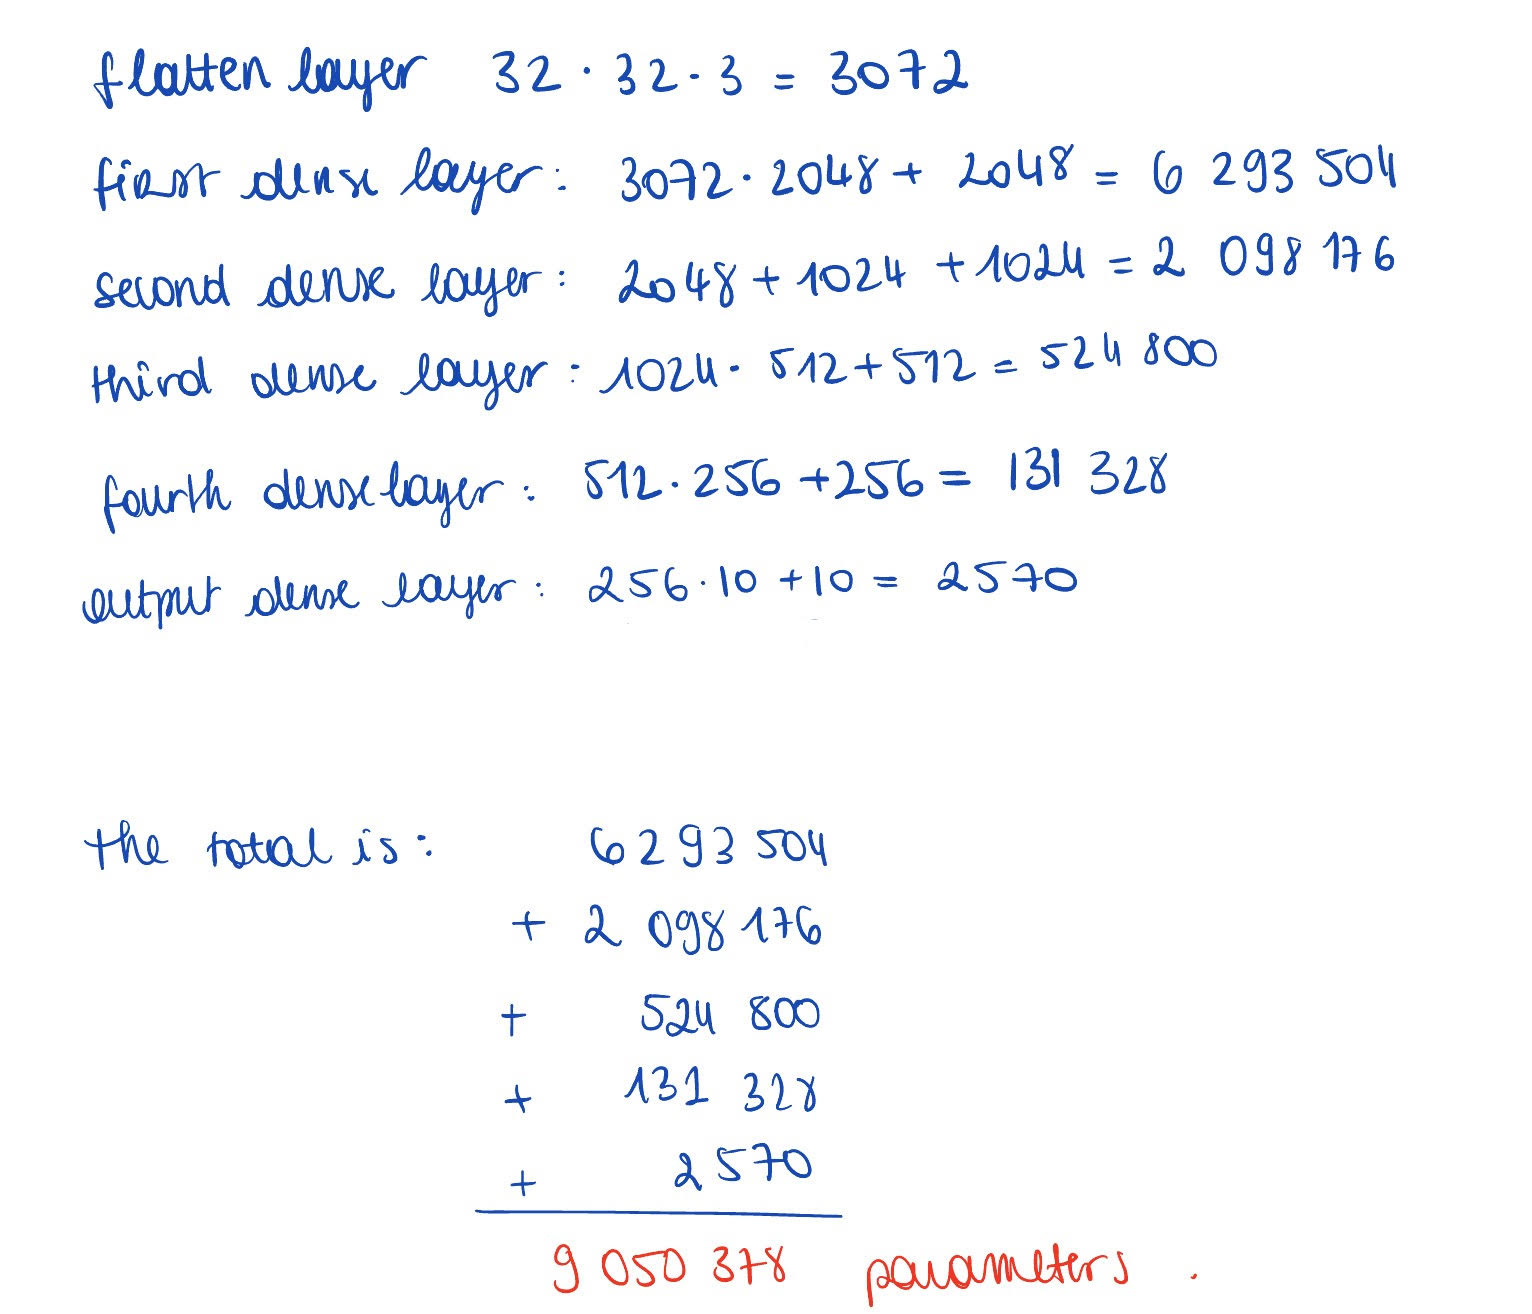

- Use the `summary()` function on model to get a text summary of the model.  Did you compute the number of parameters correctly? **No answer expected**

In [ ]:
model.summary()

## SGD algorithm (recall from lab_session_06)

Until now, we used (the "classical" or "batch") gradient descent, i.e. we summed the gradient of the loss w.r.t. each point in the dataset and then performed an update step, e.g.

$$\theta^{(t + 1)} = \theta^{(t)} - \eta \sum_{i=1}^n \nabla_{\theta^{(t)}}\ell_i.$$

Whenever $n$ is very large, this can become a problem. Alternatively, one could do:

$$\theta^{(t + 1)} = \theta^{(t)} - \eta \nabla_{\theta^{(t)}} \ell_i,$$

where $i$ is sampled randomly without replacement from $\{1, \dots, n\}$ and $\theta$ denotes either the weight $W^\ell$ or the bias $b^\ell$. Now $\theta^{(t)}$ changes "more often" so this can yield instabilities... such that "mini-batch(es)" might be needed: instead of using all the training data, or a single data point, we split the data into smaller subsets (e.g. 32 samples).

- Train the model:
  - Start with a small batch size of 32 samples and train the model for 10 epochs;
  - Use early stopping on the validation accuracy with a patience of 2.

*[Early stopping](https://keras.io/api/callbacks/early_stopping/):* stop before reaching the specified number of epochs if given criteria are met, e.g. if a level of improvement during the last epoch(s) has not been reached.

*Patience:* number of epochs where the given criteria have not been matched, but we "pay to view".

*[Keras callbacks](https://keras.io/api/callbacks/)*: functions evaluated at the end of each epoch, e.g. an early stopping rule, or some monitoring / saving function, ...

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

def train_model(model, x: np.array, y: np.array,
                x_test: np.array, y_test: np.array,
                batch_size: int = 32, epochs: int = 10):
    """
    Trains the model on the given data.

    :param keras.sequential model: the instanciated model to train
    :param numpy.array x: the training data
    :param numpy.array y: the true values
    :param numpy.array x_test: the test data
    :param numpy.array y_test: the true test values
    :param int batch_size: size of each processed batch
    :param int epochs: number of epochs
    """
    # ...
    # model.fit(...)  # <- TO UNCOMMENT AND COMPLETE
    # YOUR CODE HERE
    callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
    )]

    model.fit(x, y, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks = callbacks) 

You may ignore warnings in the following cell.

In [ ]:
train_model(model, x_train, y_train, x_test, y_test)

- How does the model perform? Is it any better than a random guess? 
- Try changing the batch size to see if there is any improvement.
- Try adding batch normalization after each hidden layer.  Any better?

Discuss in the cell(s) below **that says "YOUR ANSWERE HERE"**.

YOUR ANSWER HERE

The model's accuracy is 47,27% which is better than a random guess which would have accuracy around 10%. By changing to a larger batch it stabilize the learning adding batch normalization leads to higher accuracy.

## Exercise 6: Convolutional Networks

Convolutional neural networks (see this week's slides) allow us to do drastically better on this dataset (and many image classification problems in general). In this task, you will build your first convolutional network and see how it performs.

Recall that the idea of Convolutional Networks is to rely on "filters" which can be interpreted as (spatially) **shared** weights. In the following example, we have an 8x8 grayscale image to which we apply a 3x3 filter. A filter is similar to the weight matrix $W^\ell$ that we have seen up to now for fully connected / dense neural networks, except that its parameters (*i.e.* each entry of the weight matrix) is the same for each input; it is "slided" vertically and horizontally:

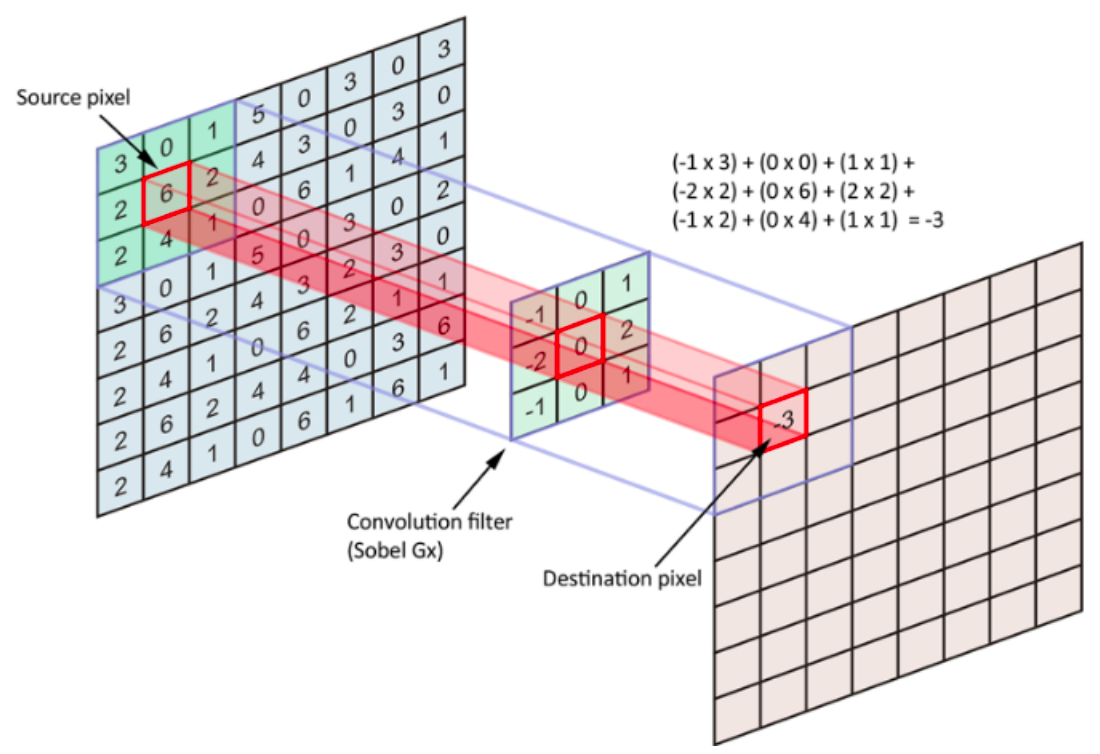

In the example above, the output has same size as the input, such that we used:

* "same" padding
    
Padding means adding 0s to the edges of the input such that the result of applying the filter has the desired size. In this example, "same" padding is equivalent to using a padding that makes the output the same shape as the input. To do so a row and a column of 0s is implicitly added at the beginning and at the end of the input.

* a stride of 1

The stride denotes by how much indices we shift the filter horizontally and vertically at each step. A stride of 2 is given as an example below:

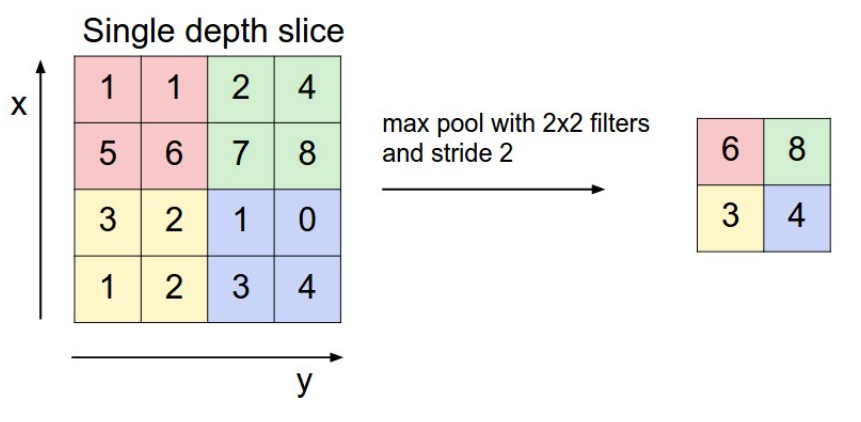

You may have noticed that in the example above, we don't apply a filter to the input but rather we take the maximum in each "area". This is called a maxpool layer and it is used to progressively reduce the size of the input in hidden layers. Stacking convolutional layers and maxpool layers forms the basis of many image classification competition winners in the last decade, such as LeNet-5 (interpret "Subsampling" as maxpooling on this figure):

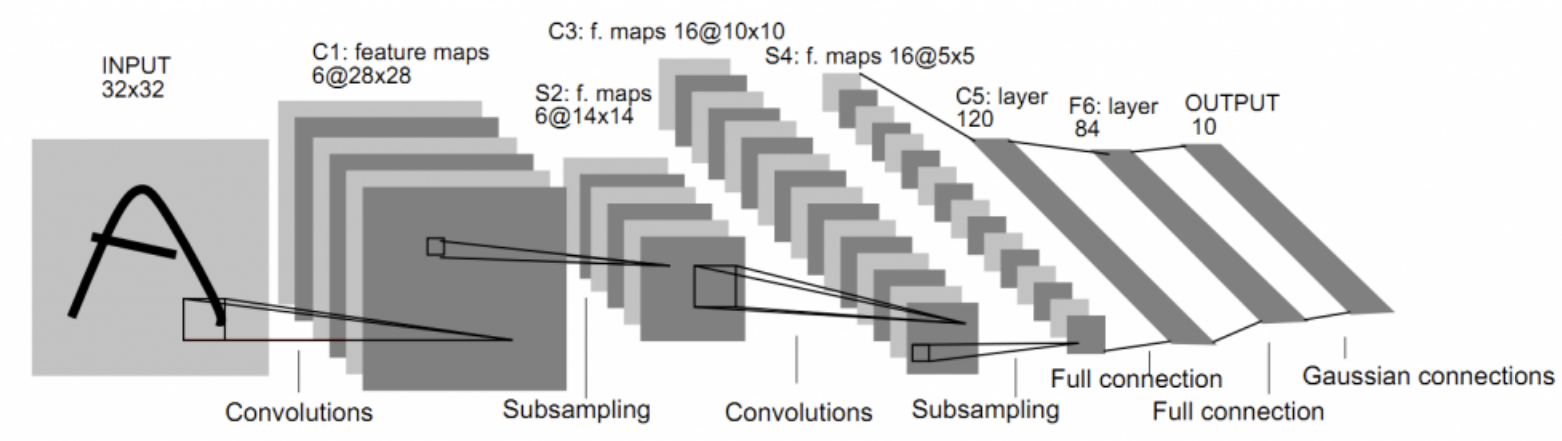

Note that at some point, we still flatten the input and use a fully connected layer so as to be able to output *e.g.* predicted labels (more on this below).

- Create a new model with the following layers
  - 3x3 [2D convolution](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) with zero padding (same), 32 filters
  - ReLU activation
  - 3x3 2D convolution, no padding, 32 filters
  - ReLU activation
  - Max pooling with size (2,2)
  - 3x3 2D convolution, no padding, 64 filters
  - ReLU activation
  - 3x3 2D convolution, no padding, 64 filters
  - ReLU activation
  - Max pooling with size (2,2)
  - Flatten
  - Dense layer with 512 nodes, ReLU activation
  - Softmax output layer with 10 nodes
- Compile the network with same optimizer and metrics as the dense network. 

In [ ]:
def cnn_model(input_shape: tuple, num_classes: int):
    """
    Returns a compiled keras Conv2D model
    
    :param tuple input_shape: shape of ONE example as passed to the first layer
    :param int num_classes: number of output classes as passed to the last layer
    """
    # model = ...
    # YOUR CODE HERE
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        Activation('relu'),
        
        Conv2D(32, (3, 3), padding='valid'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), padding='valid'),
        Activation('relu'),
        Conv2D(64, (3, 3), padding='valid'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512),
        Activation('relu'),
        Dense(num_classes),
        Activation('softmax')
    ])
    
    # model.compile(...)
    # YOUR CODE HERE
    model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = cnn_model(x_train.shape[1:], 10)
assert len(model.layers) >= 8

- Compute by hand the number of trainable parameters in this network.  Are there more or less than the more simple dense network? Why? (Give some details; use the markdown cell below OR add a new cell add an image using Edit > Insert Image).

YOUR ANSWER HERE

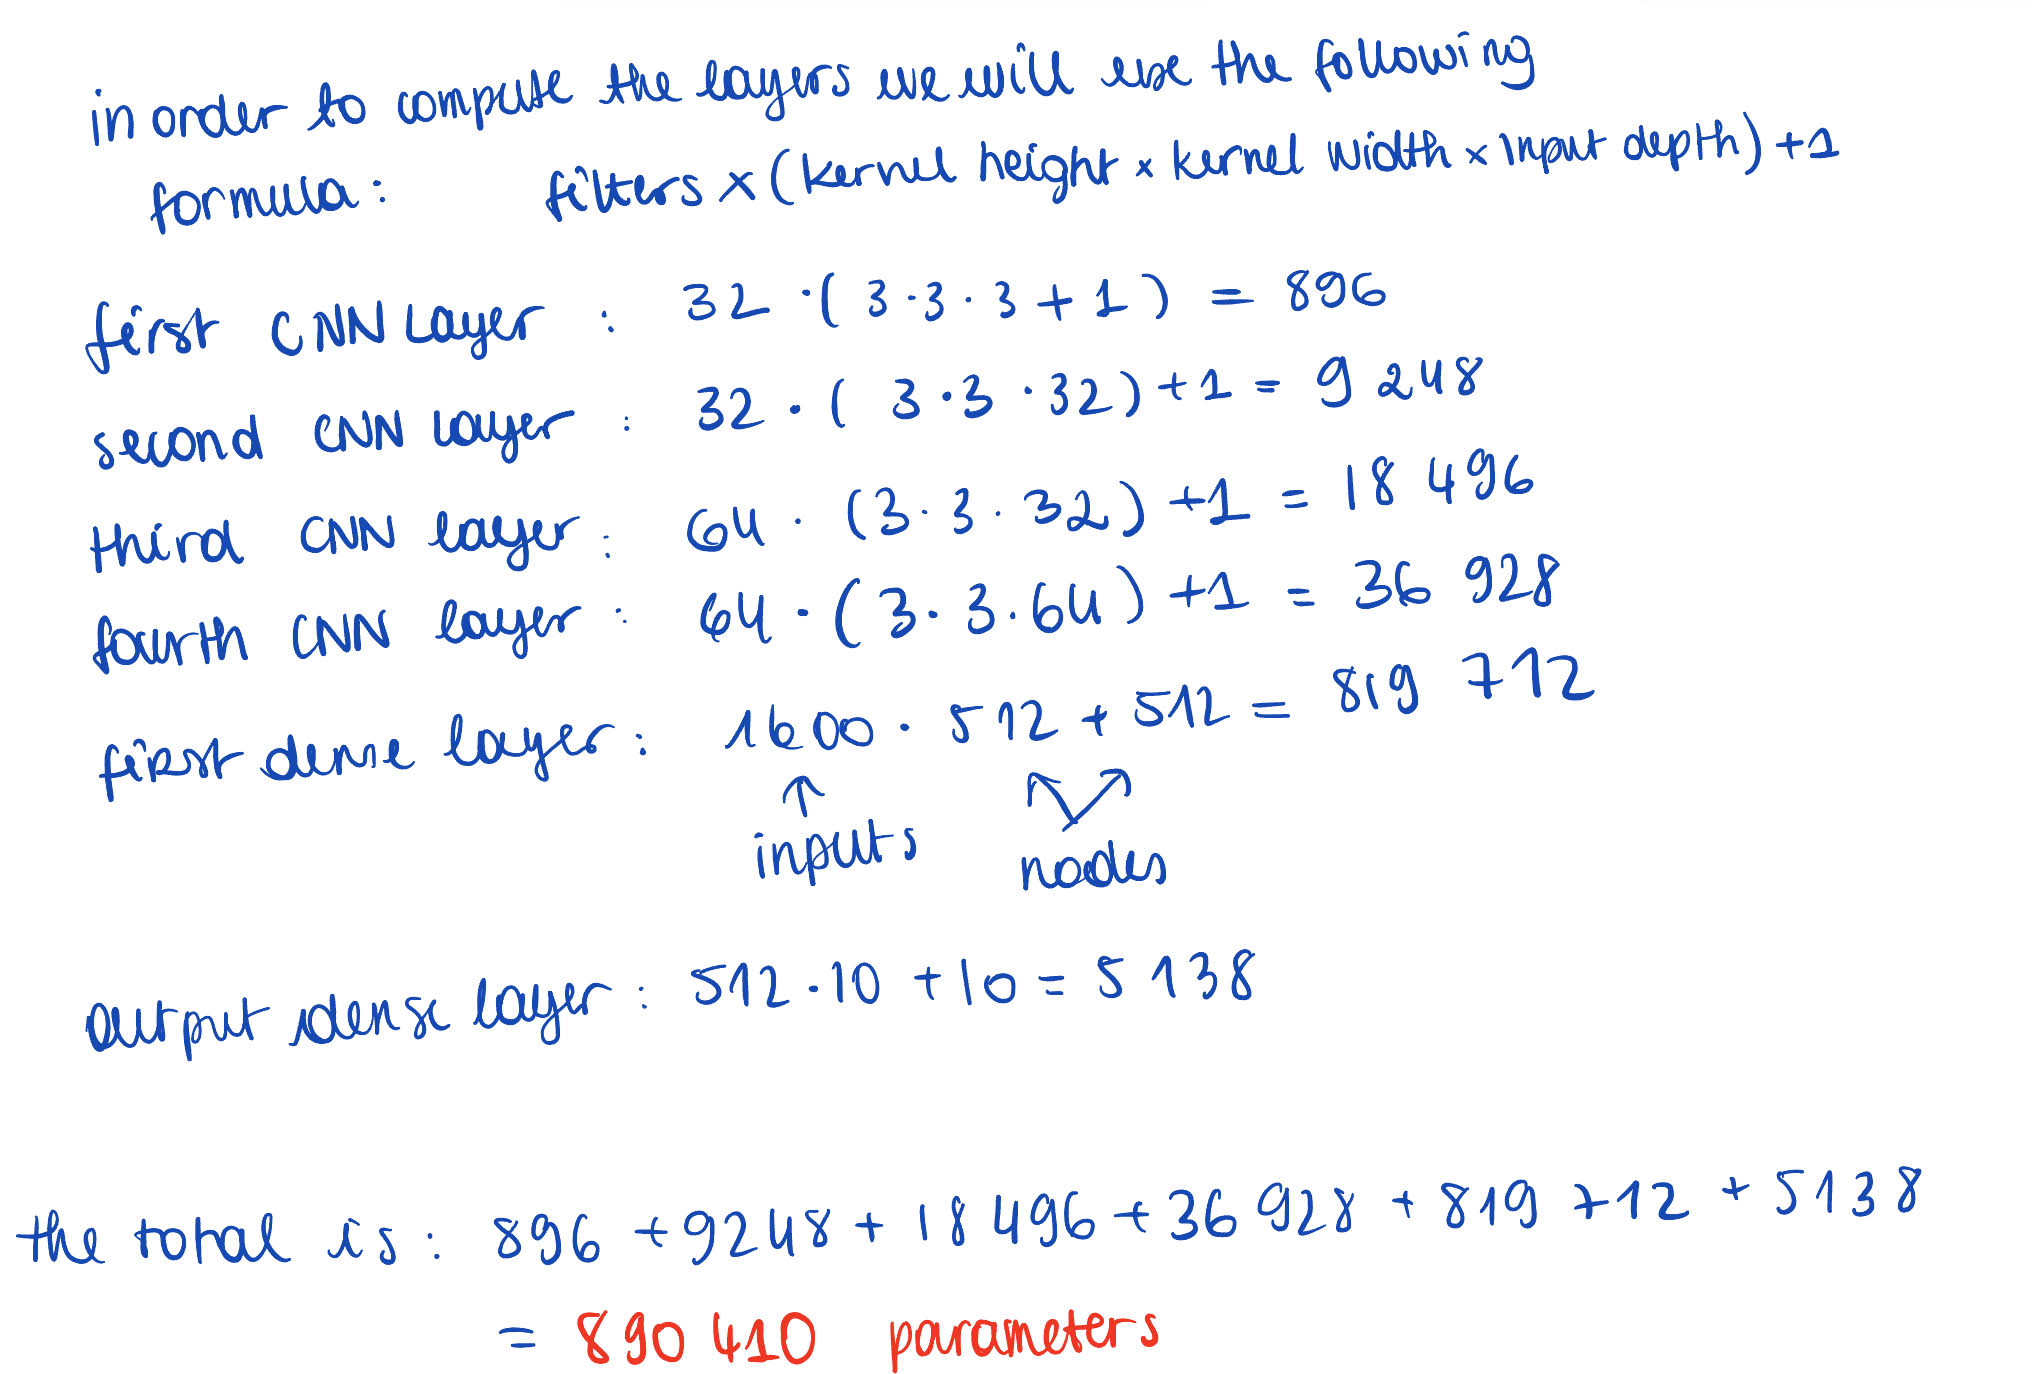

Confirm with `summary()`.

In [ ]:
model.summary()

- Use the same training procedure as before for 10 epochs and batch size of 32.
- How does the validation accuracy change with each epoch?
- Increase the batch size to 64 and retrain.  Better or worse?  Try 128 as well.  How does increasing the batch size improve the training?
- Note how the validation accuracy begins to decrease at some point, while the training accuracy continues to increase.  What is this phenomena called?  Try adding 3 dropout layers to the model, one before each max pooling layer and one before the last layer, using a dropout ratio of 0.25.  Does this improve over-fitting?
- Play with batch normalization.  For example, add batch normalization layers after each dropout layer.  Do you notice a faster increase in the model improvement? Why?

Discuss in the cell below **that says "YOUR ANSWER HERE"**.

In [ ]:
# Uncomment: computationally heavy
train_model(model, x_train, y_train, x_test, y_test)

YOUR ANSWER HERE

# Exercise 7: Make some predictions

Assuming all went well during the previous tasks, you can now predict the category of a new image!  Here are a few examples of predictions:

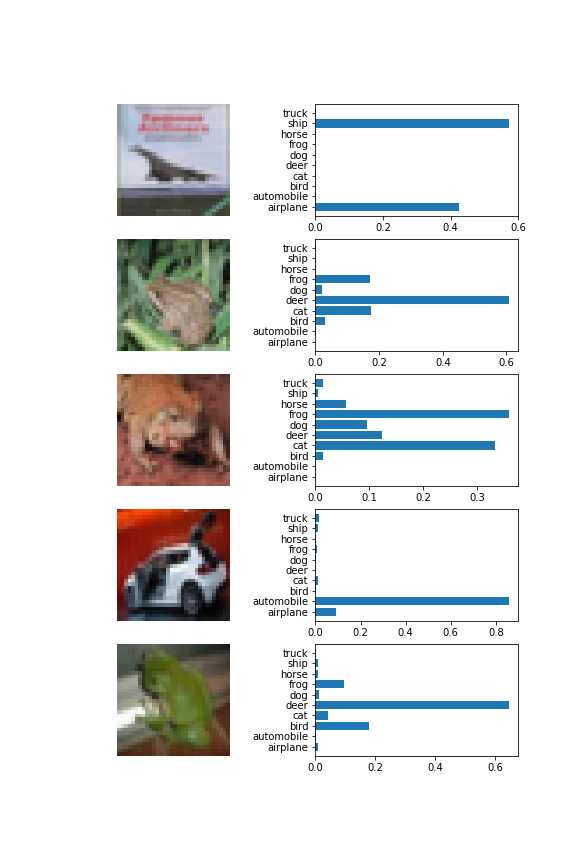

- Use `predict` on your trained model to test its prediction on a few example images.  You can use images taken from the test dataset, as these were not used to train your model. *Hint*: it can be convenient to use the `save` and `load_model` functions from Keras if you plan on working back and forth on the lab, i.e. you can save the model after training it, and then decide to load from from the file instead of building a new one on successive runs.
- Using `imshow`, subplots and `barh` from `matplotlib.pyplot`, try to recreate the image above for a few example images.

In [ ]:
def predict(model, x: np.array, labels: list, file_name: str = None) -> np.array:
    """
    Plots the figures for which we want to predict the class alongside
    the predicted probabilities of each class.

    :param model: Keras model
    :param numpy.array x: a few test points to predict
    :param list labels: the list of labels associated with classes 0, ..., 9
    :param str file_name: (optional) filename to save the plot
    :return: the class prediction
    """
    y = model.predict(x)
    
    # Create visualization
    plt.figure(figsize=(10, 4 * len(x)))
    
    for i in range(len(x)):
        # Display image
        plt.subplot(len(x), 2, 2*i + 1)
        plt.imshow(x[i].squeeze() if x[i].shape[-1] == 1 else x[i])
        plt.axis('off')
        plt.title(f'True: {labels[np.argmax(y[i])]}')
        
        # Display prediction probabilities
        plt.subplot(len(x), 2, 2*i + 2)
        plt.barh(labels, y[i])
        plt.xlabel('Probability')
        plt.xlim([0, 1])
        plt.title('Prediction Confidence')
    
    plt.tight_layout()
    
    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()
        
    return y

In [ ]:
y_pred = predict(model, x_test[3:8, :, :, :], labels)
assert y_pred.shape == (x_test[3:8, :, :, :].shape[0], 10)

- Create a _confusion matrix_. A confusion matrix is often used in supervised learning to understand how well (or not) each category is being classified.  Each element (i,j) in the confusion matrix represents for each true (actual) class i the predicted class j.  Consider the following 10 predictions for a 2 category model predicting male or female.

| example     | true category  | predicted category  |
|-------------|----------------|---------------------|
| 1           | male           | male                |
| 2           | female         | male                |
| 3           | female         | female              |
| 4           | male           | male                |
| 5           | male           | female              |
| 6           | male           | male                |
| 7           | female         | female              |
| 8           | male           | female              |
| 9           | female         | female              |
| 10          | female         | female              |

Based on the above data, the model is accurate 70% of the time.  The confusion matrix is

|                    | _predicted_ male | _predicted_ female |
|--------------------|------------------|--------------------|
| _actual_ male      | 3                | 2                  |
| _actual_ female    | 1                | 4                  |

The confusion matrix gives us more information than a simple accuracy measurement.  In this case, we see that the class female has a higher accuracy over male. Create the confusion matrix **as a Pandas DataFrame** on the CIFAR-10 dataset using the test data, with **"actual {label}"** as rows and **"predicted {label}"** as columns.  What does it tell you about the relationships between each class? Comment in the cell(s) below.

In [ ]:
def confusion_matrix(model, x_test: np.array, y_test: np.array, labels: list) -> pd.DataFrame:
    """
    Predict on x_test using model
    Use sklearn.metrics.confusion_matrix to get the matrix
    Prettify the result

    :param model: keras model
    :param numpy.array x: a few test points to predict
    :param numpy.array x: true values associated with x_test
    :param list labels: list of names of labels
    """
    # df = ...  # <- TO UNCOMMENT AND COMPLETE
    # YOUR CODE HERE
    ypred = model.predict(x_test)
    classes = np.argmax(ypred, axis = 1)
    
    if y_test.ndim>1:
        y_test = np.argmax(y_test, axis=1)

    cm = metrics.confusion_matrix(y_test, classes)
    df = pd.DataFrame(cm, columns=labels, index=labels)
    # making the table look fancy
    df.style.set_properties(**{'width':'6em', 'text-align':'center'}).set_table_styles([dict(selector="th", props=[('text-align', 'center')])])
    return df

In [ ]:
conf_matrix = confusion_matrix(model, x_test, y_test, labels)

In [ ]:
conf_matrix

## F1 Score

Quoting Wikipedia: "Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance."

In our example, precision for the airplane class is the number of true airplanes classified as such by our model divided by number of airplanes our model predicted. In other words, the diagonal elements divided by the sum over the whole column. Recall is the number of true airplanes classified as such by our model divided by the number of actual airplanes. In other words, the diagonal elements divided by the sum over the whole row.

In general, **one wants both metrics to be high**. In an extreme case, if we predict only airplanes, all relevant airplanes will be among the predicted, yielding a recall of 1, but a poor precision. On the other end of the spectrum, if we're good at predicting only a particular type of airplane which appears in the dataset as an airplane, and predict no other airplanes, precision will be high, but recall quite poor.

Subsequently, the F1 score is traditionally used to sum up both metrics as their harmonic mean:

$$\text{F1} = \dfrac{2 * \text{precision} * \text{recall}}{\text{precision} + \text{recall}}.$$

This metric can be computed for each class. They can then be averaged. The simple average is called a **macro** F1 score. A **weighted** average takes into account the proportion of samples in each class in the training dataset to weight each F1 score.

Implement the F1 score below.

In [ ]:
def f1_score(conf_matrix: pd.DataFrame):
    """
    Compute f1_score of each category, macro and weighted f1

    :param pandas.DataFrame conf_matrix: a confidence matrix (as given by confusion_matrix)
    """
    # YOUR CODE HERE
    num_classes = len(conf_matrix)
    precision_per_class = np.zeros(num_classes)
    recall_per_class = np.zeros(num_classes)
    
    # Calculate precision and recall for each class
    for idx in range(num_classes):
        true_positives = conf_matrix.iloc[idx, idx]
        total_predicted_as_class = conf_matrix.iloc[:, idx].sum()
        total_actual_class = conf_matrix.iloc[idx, :].sum()
        
        precision_per_class[idx] = true_positives / total_predicted_as_class if total_predicted_as_class != 0 else 0
        recall_per_class[idx] = true_positives / total_actual_class if total_actual_class != 0 else 0
    
    # F1 score per class
    f1_per_class = 2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class)
    f1_per_class = np.nan_to_num(f1_per_class)

    # Macro F1: unweighted average
    macro_f1 = np.mean(f1_per_class)

    # Weighted F1: weighted by number of true instances
    class_support = conf_matrix.sum(axis=1).values
    weighted_f1 = np.sum(f1_per_class * class_support) / class_support.sum() if class_support.sum() != 0 else 0

    return f1_per_class, macro_f1, weighted_f1

In [ ]:
f1_scores, macro_f1, weighted_f1 = f1_score(conf_matrix)
print("F1 Macro:", macro_f1)
print("F1 Weighted:", weighted_f1)

# Bonus: Further exercises

- Try training on [additional datasets available with Keras](https://keras.io/api/datasets/). For example, the MNIST data (hand-written digits) will require virtually no code changes to train.
- Play with different CNN architectures. Can you beat the performance of the net used in this lab?

You may have noticed that in the example above, we don't apply a filter to the input but rather we take the maximum in each "area". This is called a maxpool layer and it is used to progressively reduce the size of the input in hidden layers. Stacking convolutional layers and maxpool layers forms the basis of many image classification competition winners in the last decade, such as LeNet-5 (interpret "Subsampling" as maxpooling on this figure):